### **Big-O Cheat Sheet**: Contains time & space complexity for popular algorithms [bigocheatsheet.com](https://www.bigocheatsheet.com/).

# TIME COMPLEXITY
Based on article [Understading time complexity with Python examples.](https://towardsdatascience.com/understanding-time-complexity-with-python-examples-2bda6e8158a7)\
These are the most common time complexities expressed using the Big-O notation:
1. **Constant Time:** O(1) [EXCELLENT PERFORMANCE]
2. **Logarithmic Time:** O(log n) [EXCELLENT/GOOD PERFORMANCE]
3. **Linear Time:** O(n) [FAIR PERFORMANCE]
4. **Quasilinear Time:** O(n log n) [BAD PERFORMANCE]
5. **Quadratic Time:** O(n^2) [HORRIBLE PERFORMANCE]
6. **Exponential Time:** O(2^n) [HORRIBLE PERFORMANCE]
7. **Factorial Time:** O(n!) [HORRIBLE PERFORMANCE]

**NOTE:** when analyzing the time complexity of a multi-operational algorithm the largest time complexity its the correct one to describe said algorithm (see plots).

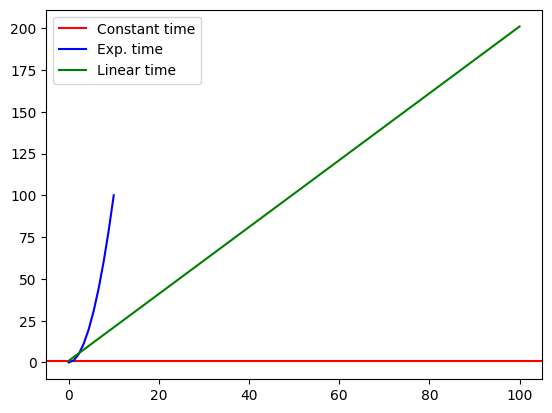

In [119]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# constant time
plt.axhline(y=1, label="Constant time", color="red")

# exponential time
x2 = np.linspace(0, 10, 10)
y2 = x2**2
plt.plot(x2, y2, label="Exp. time", color="blue")

# linear time
x3 = np.linspace(0, 100, 10)
y3 = 2*x3+1
plt.plot(x3, y3, label="Linear time", color="green")


plt.legend()
plt.show()

## CONSTANT TIME - O(1)
This happens when the algorithm doesn't depend on the input data (n). No matter what its size is the running time will tend to the same

In [ ]:
if a > b:
    return True
else:
    return False

In [3]:
# example with a function
def get_head(_list):
    return _list[0]
head = get_head([1, 2, 3, 4, 5])
print(f"First element in list: {head}")

First element in list: 1


## LOGARITHMIC TIME - O(log n)
An algorithm is said to have a logarithmic time complexity when it reduces the size of the input in each step (it don't need to look at all values of the input data).\
<u>**NOTE:** If an algorithm MUST access all elements of its input at least once it cannot take logarithmic time to be executed, that would be a linear time execution.</u>

In [4]:
data = [1, 2, 3, 4]
for index in range(0, len(data), 3):
    # each iteration is shorter the input?
    print(data[index])

1
4


In [102]:
def binary_search(data, value):
    n = len(data)
    left = 0
    right = n - 1
    while left <= right:
        middle = (left + right) // 2 # calcualte middle of list
        if value < data[middle]:
            right = middle - 1 # if its lower set a new bounder
        elif value > data[middle]:
            left = middle + 1
        else:
            return middle
        
    raise ValueError("Value is not in list")

if __name__ == "__main__":
    data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    val = 7
    print(f"{val} is in position number: {binary_search(data, val)}")

7 is in position number: 6


## LINEAR TIME - O(n)
An algorithm is said to have a linear time complexity when the running time increases at most linearly with the size of the input data. <br> 
<u>**This is the best possible time complexity when the algorithm must examine all values in the input data**</u>

In [10]:
data = ["a", "b", "c", "d"]
for value in data:
    print(value) # if we HAD to print ever value

a
b
c
d


In [13]:
def linear_search(data, value):
    for index in range(len(data)):
        if value == data[index]:
            return index
    raise ValueError("Value not found in the list")

if __name__ == "__main__":
    data = [1, 2, 9, 8, 3, 4, 7, 6, 5]
    val = 3
    print(f"{val} is in position number: {linear_search(data, val)}")

3 is in position number: 4


## QUASILINEAR TIME - O(n log n)
An algorithm is said to have a quasilinear time complexity when each operation in the input data have a logartihm time complexity. Its commonlt seen in algorithms like:
- **Mergesort:** is an efficient general-purpose, and comparison-based sorting algorithm. **its a stable sorting algorithm (mostly).**\
    works kinda like this:
        
    1. Divide the unsorte list into n sublists, each containing one element (a list of one is sorted)
    1. Merge the sublists to produce new sorted sublists until there is only one sublist remaining. This will be the sorted list. <br><br>

- **Timsort:** is a hybrid (combines two algorithms), **stable sorting**, derived from **merge sort** and **insertion sort** designed to perform well on many kinds of real-world data. This is the default sorting algorithm used in Python since 2.6 version.
- **Heapsort:** Can be thought a as improved **selection sort**: like selection sort, heapsort divides its input into a sorted and an unsorted region, an it iteratively shrinks the unsorted region by extracting the largest element from it and inserting it into the sorted region. 
    - **Heap:** A heap is specialized tree-based data structure which is essentially an almost complete (a type of binary tree, a tree whose rightmost leaves (if not all) have been removed).\
    In a **max-heap** for any given node C, if P is a parent node of C, then the key (the value) of P is greater than or equal to the key of C. In a min heap happens the same but P is less than or equal to C.

In [106]:
result = []
_data = [1, 2, 3, 4, 5, 6, 7, 8, 9]
val = 9
for value in range(10):
    result.append(binary_search(_data, val))

for _ in result:
    print(f"Binary search: {_}") # applying logarithmic algorithm n times

Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8
Binary search: 8


In [108]:
def merge_sort(data):
    if len(data) <= 1:
        return

    mid = len(data) // 2
    left_data = data[:mid]
    right_data = data[mid:]

    merge_sort(left_data)
    merge_sort(right_data)

    left_index = 0
    right_index = 0
    data_index = 0

    while left_index < len(left_data) and right_index < len(right_data):
        if left_data[left_index] < right_data[right_index]:
            data[data_index] = left_data[left_index]
            left_index += 1
        else:
            data[data_index] = right_data[right_index]
            right_index += 1
        data_index += 1
    
    if left_index < len(left_data):
        del data[data_index:]
        data += left_data[left_index:]
    elif right_index < len(right_data):
        del data[data_index:]
        data += right_data[right_index:]

if __name__ == "__main__":
    data = [9, 1, 7, 6, 3, 7, 8, 10]
    merge_sort(data)
    print(data)

[1, 3, 6, 7, 7, 8, 9, 10]


## QUADRATIC TIME - O(n^2)
When has to perform a linear time operation for each value in input data

In [ ]:
for x in data:
    for y in data:
        print(x, y)

In [122]:
# bubble sort is a great example since for each value it needs to compare all other values in the list
def bubble_sort(data):
    swapped = True
    while swapped:
        swapped = False
        for i in range(len(data) - 1):
            if data[i] > data[i+1]:
                data[i], data[i+1] = data[i+1], data[i]
                swapped = True

if __name__ == "__main__":
    data = [9, 1, 7, 6, 2, 8, 5, 3, 4, 0]
    bubble_sort(data)
    print(f"Data bubble sorted: {data}")

Data bubble sorted: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## EXPONENTIAL TIME - O(2^n)
An algorithm is said to have an exponential time complexity when the growth doubles with each addition to the input data set. This kind of time complexity is usually seen in brute-force algorithms.\
A brute-force attack may systematically check all possible elements of a password by iterating through subsets. Using an exponential algorithm to do this, it becomes incredibly resource-expensive to brute-force cack a long password versus a shorter one. \
**This is one reason a long password is considered more secure than a shorter one.**

In [133]:
# exponential time can be achieved through calcualting fibonacci numbers recursively
def fib(n):
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)

n = 10
print(f"fibonacci #{n}: {fib(n)}")

fibonacci #10: 55


## FACTORIAL - O(n!)
An algorithm is said to have a factorial time complexity when it grows in a factorial way based on the size of the input data:
```
2! = 2 * 1 = 2
3! = 3 * 2 * 1 = 6
4! = 4 * 3 * 2 * 1 = 24
5! = 5 * 4 * 3 * 2 * 1 = 120
6! = 6 * 5 * 4 * 3 * 2 * 1 = 720
```

In [150]:
# A classic example of a factorial algorithm is a **Heap algorithm** which is used for generating
# all possible permutations for n objects
def heap_permutation(data, n):
    if n == 1:
        print(f"Permutation: {data}")
        return

    for i in range(n):
        heap_permutation(data, n - 1)
        if n % 2 == 0:
            data[i], data[n-1] = data[n-1], data[i]
        else:
            data[0], data[n-1] = data[n-1], data[0]

if __name__ == "__main__":
    data = [1, 2, 3]
    heap_permutation(data, len(data))

Permutation: [1, 2, 3]
Permutation: [2, 1, 3]
Permutation: [3, 1, 2]
Permutation: [1, 3, 2]
Permutation: [2, 3, 1]
Permutation: [3, 2, 1]
